In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [2]:
data = pd.read_csv("Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


Text(0, 0.5, 'Salary')

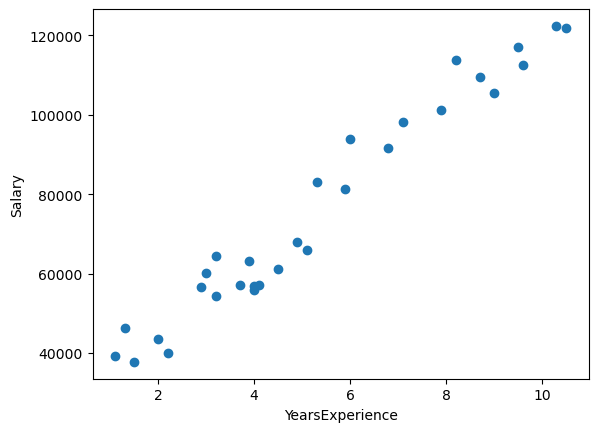

In [6]:
plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [7]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

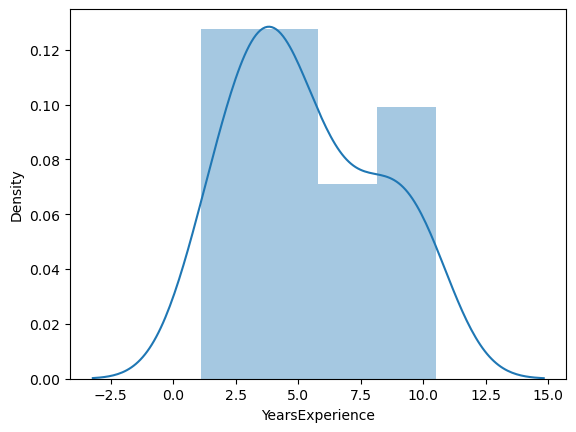

In [11]:
sns.distplot(data['YearsExperience'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

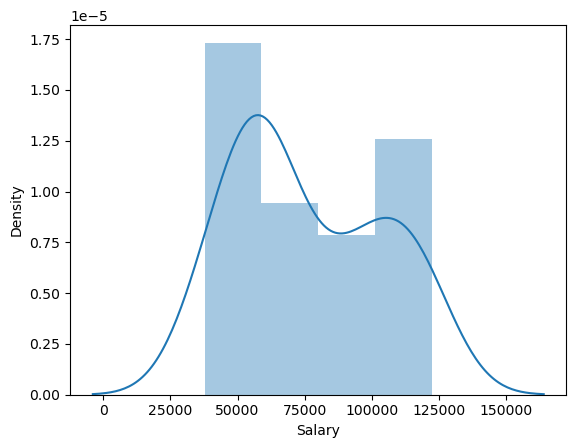

In [9]:
sns.distplot(data['Salary'])

<AxesSubplot:>

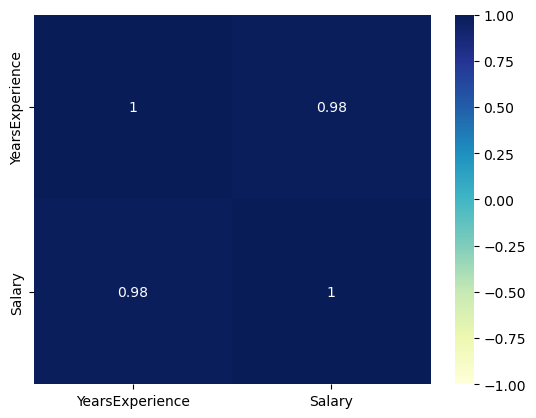

In [12]:
sns.heatmap(data=data.corr(), cmap='YlGnBu', vmin=-1, vmax=1, annot=True)

<AxesSubplot:xlabel='YearsExperience'>

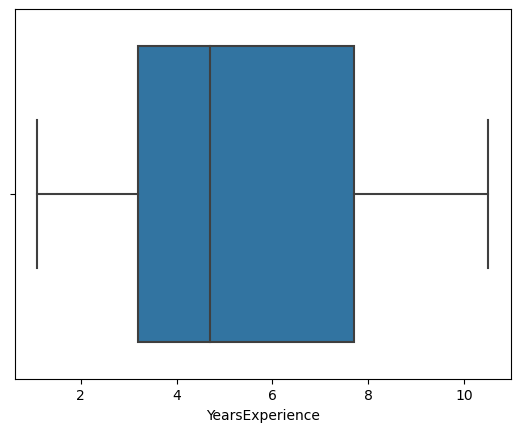

In [13]:
sns.boxplot(x='YearsExperience', data=data)

<AxesSubplot:xlabel='Salary'>

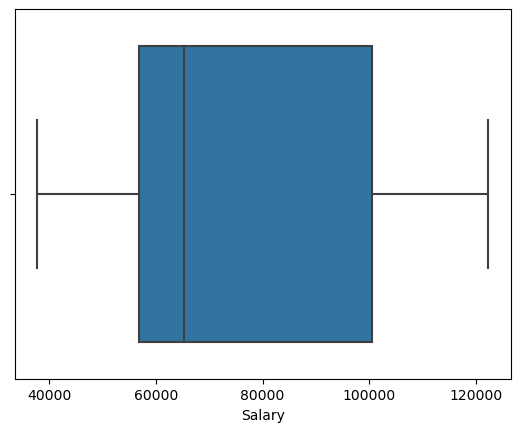

In [14]:
sns.boxplot(x='Salary', data=data)

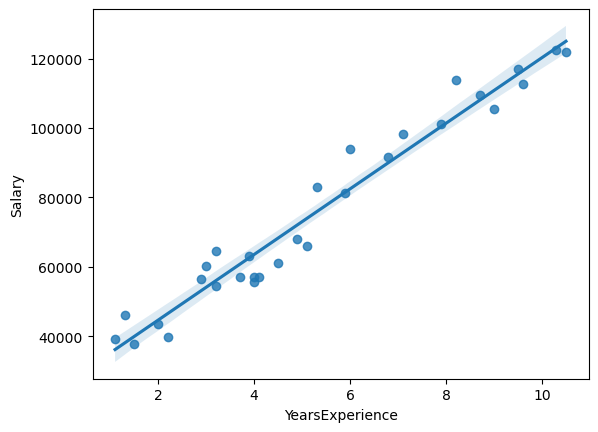

In [15]:
sns.regplot(x="YearsExperience", y="Salary", data=data);

In [18]:
model = smf.ols("Salary~YearsExperience", data=data).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        20:56:50   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [21]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)   

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [22]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [23]:
salary = 25792.200199 + 9449.962321 *3

In [25]:
print(salary)

54142.087162


In [26]:
new_data = pd.Series([4,6])
new_data

0    4
1    6
dtype: int64

In [28]:
pred = pd.DataFrame(new_data, columns=['YearsExperience'])
pred

,YearsExperience
0,4
1,6


In [29]:
model.predict(pred)

0    63592.049484
1    82491.974127
dtype: float64